In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
pd.options.display.max_rows = 1000; pd.options.display.max_columns = 100;
sns.set_style('whitegrid')

In [2]:
train = pd.read_csv('../_src/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../_src/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
numeric = [f for f in train.columns if train.dtypes[f] != 'object']
numeric.remove('SalePrice')
numeric.remove('Id')
categorical = [f for f in train.columns if train.dtypes[f] == 'object']

# Overview
1460 ids in the training set. 81 variables in the dataset. 36 numeric variables (excluding Ids and Sale Price) and 43 categorical variables.

Numeric: 
'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
'2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
'MoSold', 'YrSold'

Categorical:
'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
'MiscFeature', 'SaleType', 'SaleCondition'
## Sale Price Variable
Sale Price is what we want to predict. Mean is around 180k with a couple of outliers.

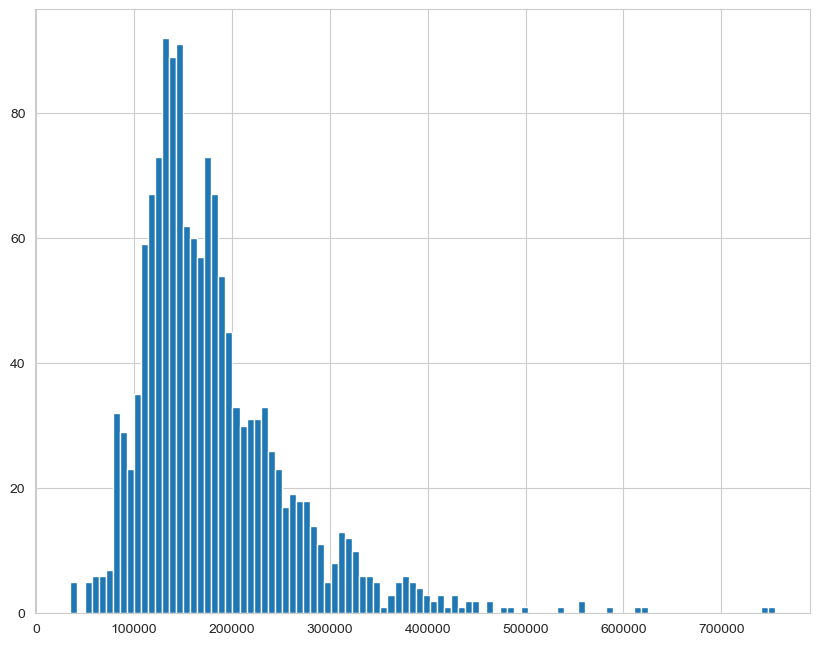

In [5]:
y = train['SalePrice']
y.hist(bins=100);

In [6]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Top Features that Correlates with Sale Price
Here are the numeric features that correlates best with Sale Price. OveralQual is a good place to start.

In [7]:
g = (train[numeric].corrwith(train['SalePrice']).sort_values(ascending=False)
     .reset_index()).head(15)
g.columns = ['Features', 'Correlation']
g.style.bar(vmax=1, vmin=0)

,Features,Correlation
0,OverallQual,0.790982
1,GrLivArea,0.708624
2,GarageCars,0.640409
3,GarageArea,0.623431
4,TotalBsmtSF,0.613581
5,1stFlrSF,0.605852
6,FullBath,0.560664
7,TotRmsAbvGrd,0.533723
8,YearBuilt,0.522897
9,YearRemodAdd,0.507101


Calculated correlation with the rest of the features. 
- GarageCars and GarageArea has a high correlation with each other.
- There are others, which I will keep in mind when I decide to combine them to create new combined features.

In [8]:
train[['SalePrice'] + list(g['Features'])[:15]].corr().style.bar(vmin=0.4)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101,0.486362,0.477493,0.466929,0.386420,0.351799
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684,0.547766,0.411876,0.396765,0.239666,0.251646
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389,0.231197,0.390857,0.461679,0.208171,0.402797
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622,0.588920,0.364204,0.300789,0.224054,0.285691
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600,0.564567,0.373066,0.269141,0.296970,0.344997
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066,0.322445,0.363936,0.339519,0.522396,0.392075
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379,0.233449,0.344501,0.410531,0.445863,0.457181
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046,0.484557,0.276833,0.243671,0.058543,0.198769
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740,0.148112,0.280682,0.326114,0.044316,0.352096
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855,0.825667,0.315707,0.147716,0.249503,0.123349


Did a pairplot just because everyone else is doing it.

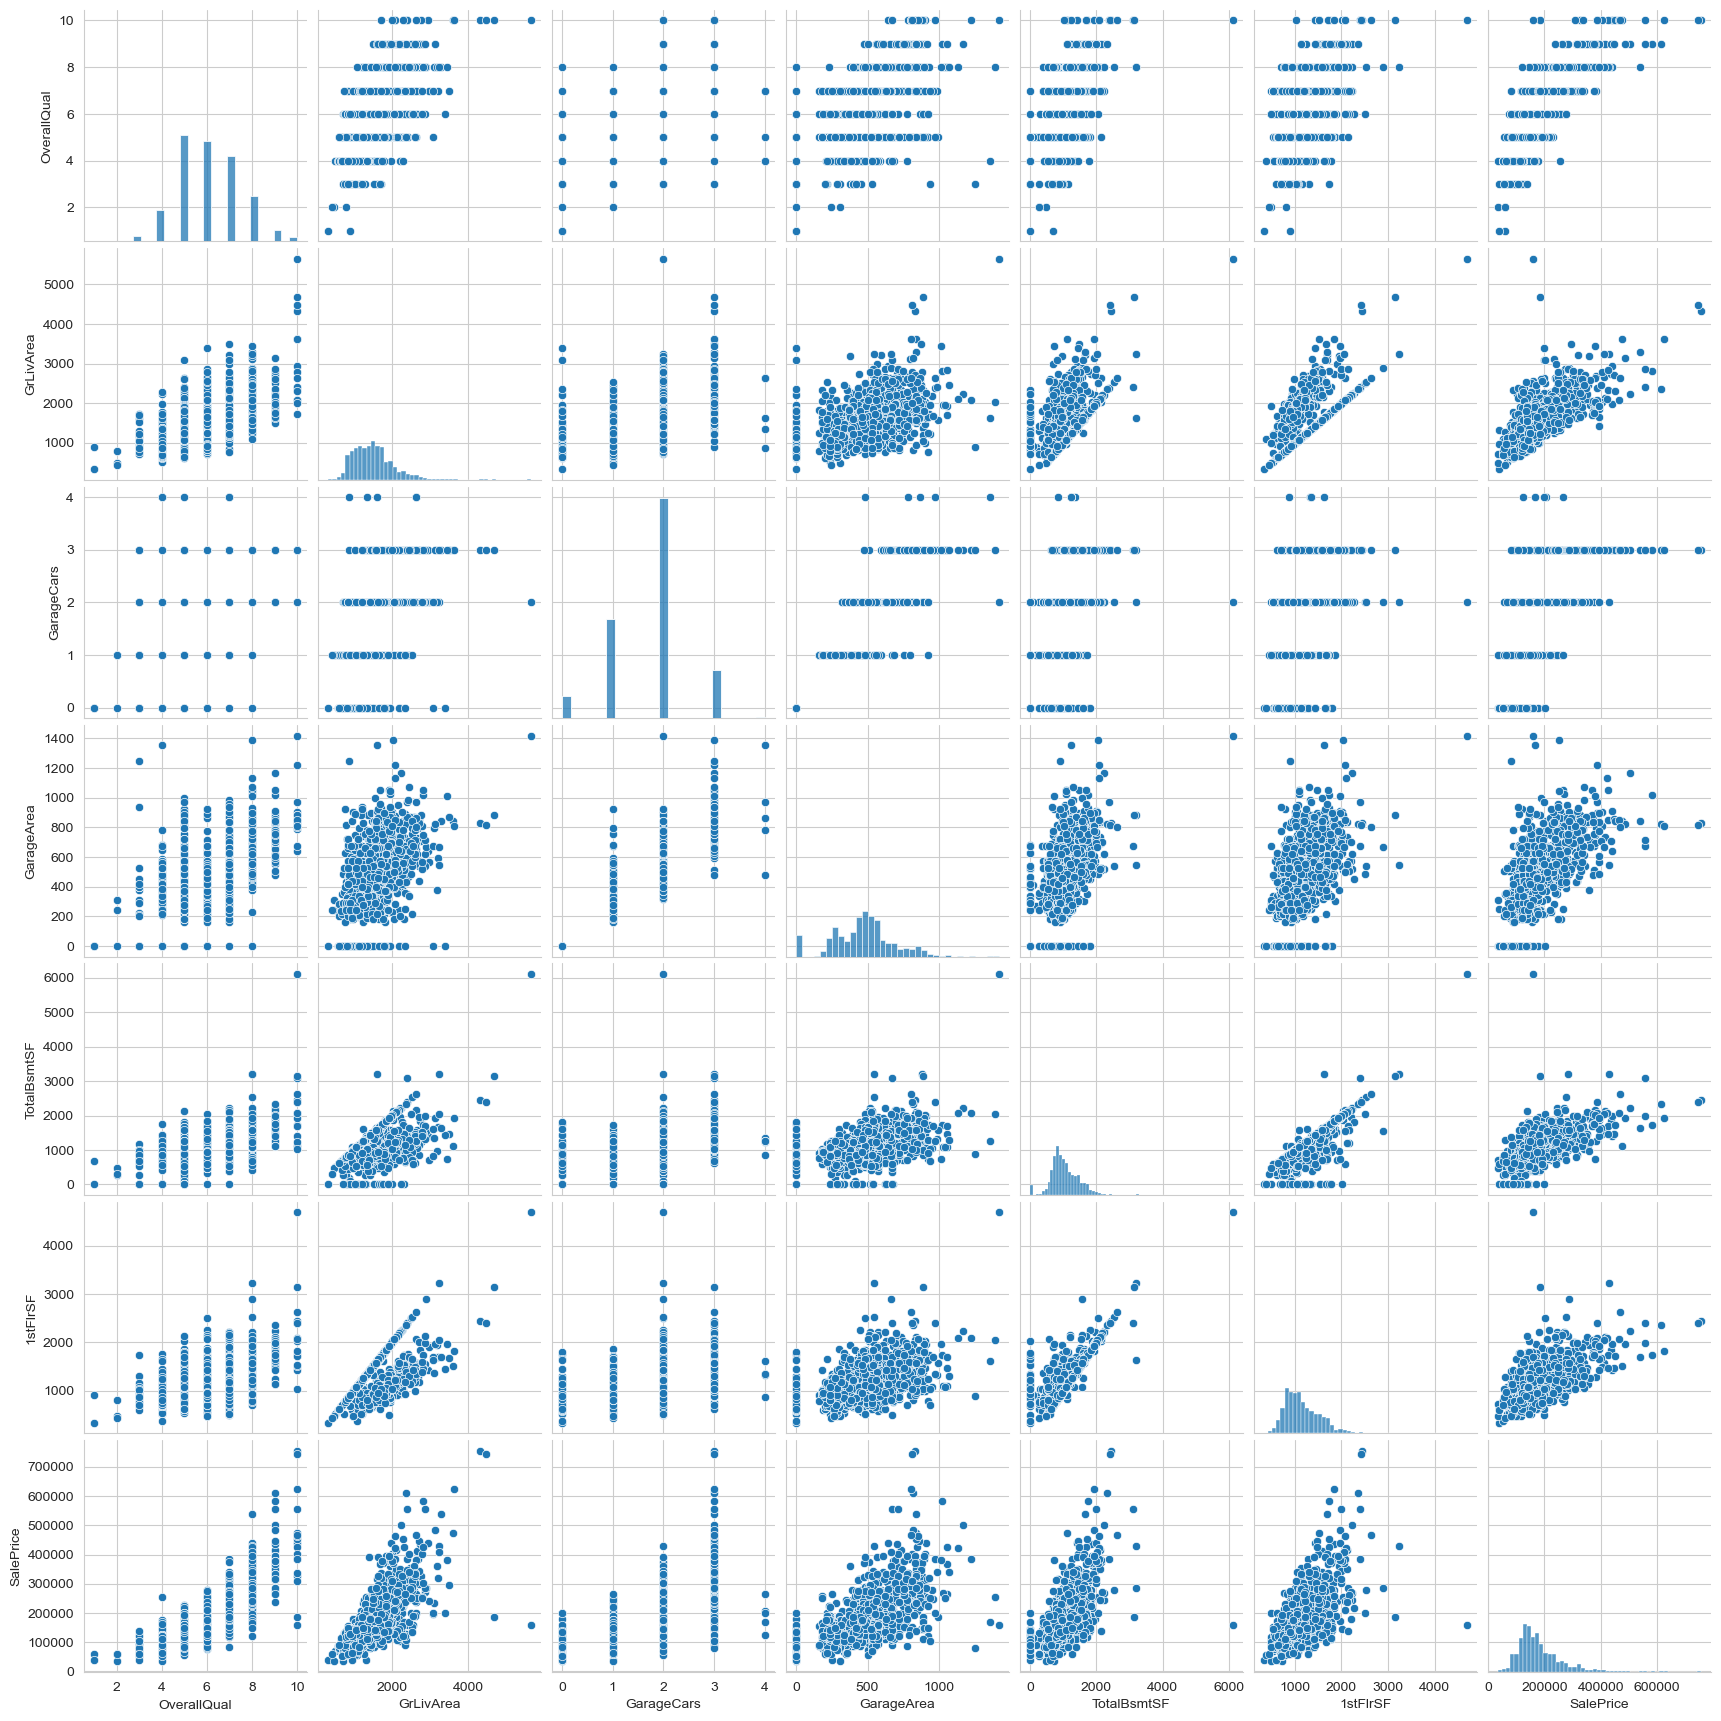

In [9]:
sns.pairplot(train[list(g['Features'])[:6] + ['SalePrice']]);

# Visualization on Key Features
Cleaning is a pain and with 81 features, there is a lot of ground to cover. Better start with the ones with high correlation. The point of all of this is to predict the price in the TEST set. Don't overdo do it. Do enough to get the job done.
## Overall Quality
SalePrice increases as OverallQual increase, we know this. Because we are working with averages, a feature with outliers that are really far from the rest of the points will skew the our algorithm. In this dataset, we found some but aren't far enough or numerous enough to become a threat to our averages.

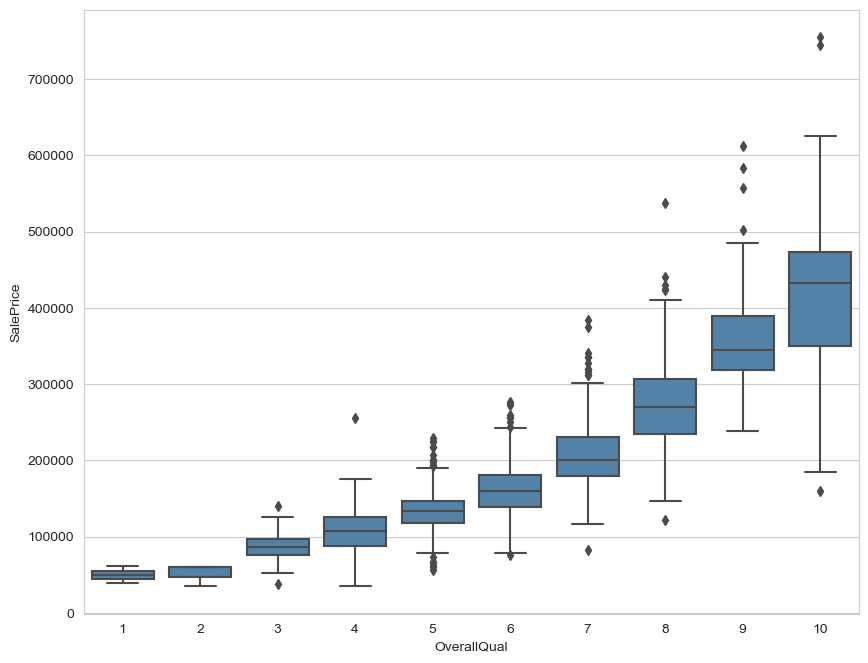

In [10]:
sns.boxplot(x=train['OverallQual'], y=train['SalePrice'], color='steelblue');

## GrLivArea
GrLivArea is "Above Grade Living Area". There are many ways to measure a house but the most frequently measurement is to measure the area that is on the ground level. In the dataset, it has a strong relationship with SalePrice. The larger the house, the more you pay. Most of the houses follows this idea except for 2 houses priced at 523 and 1298.

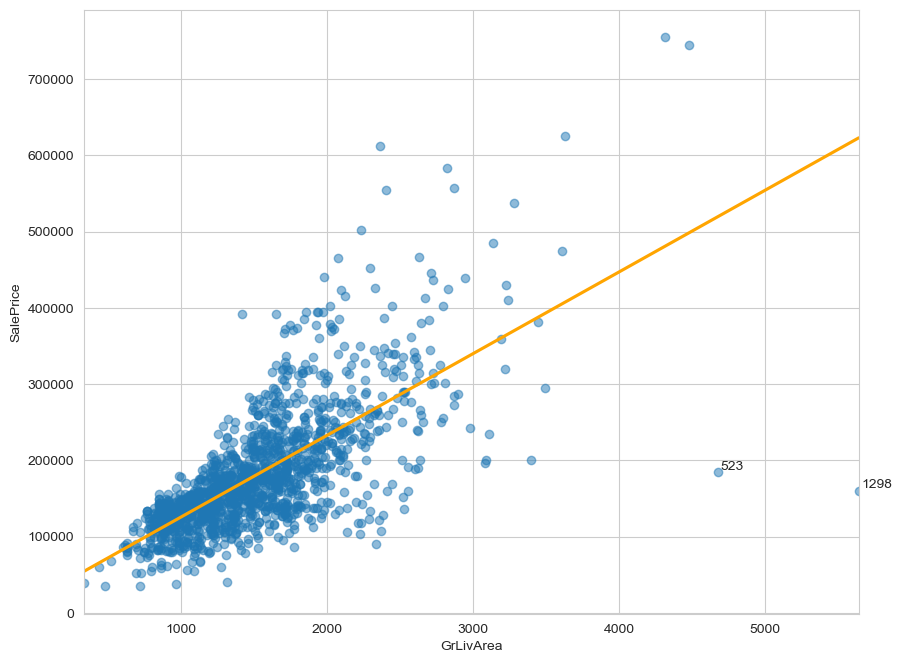

In [11]:
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], ci=None
            , scatter_kws={'alpha':0.5}
            , line_kws={"color": "orange"})

model = sm.OLS(train['GrLivArea'], train['SalePrice'])
train['resid'] = model.fit().resid

def ann(row):
    ind = row[0]
    r = row[1]
    plt.gca().annotate(ind, xy=(r['GrLivArea'], r['SalePrice']), 
            xytext=(2,2) , textcoords ="offset points", )

head = train.sort_values(by=['resid'], ascending=[False]).head(2)
for row in head.iterrows():
    ann(row)

We will keep these 2 outliers for now, since OverallQual is at 10. Unless someone died or it is on an edge of a cliff, it is mystery why these houses are cheap relative to their size.

In [12]:
head[['resid', 'SalePrice', 'OverallQual', 'GrLivArea']]

,resid,SalePrice,OverallQual,GrLivArea
1298,4397.136035,160000,10,5642
523,3238.571141,184750,10,4676


# Missing Data
19 columns that have missing data. Missing data could be used here as a way to say that the house does not have this feature. Here are all of them

In [13]:
missing = train.isnull().sum()
missing = missing[missing>0]
missing_tally = pd.DataFrame({
    'count': missing,
    'proportion': missing / len(train) * 100
})
missing_tally.sort_values(by='proportion', ascending=False).style.bar(vmax=100)

,count,proportion
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


# Batch Exploring Features
## Categorical Variables


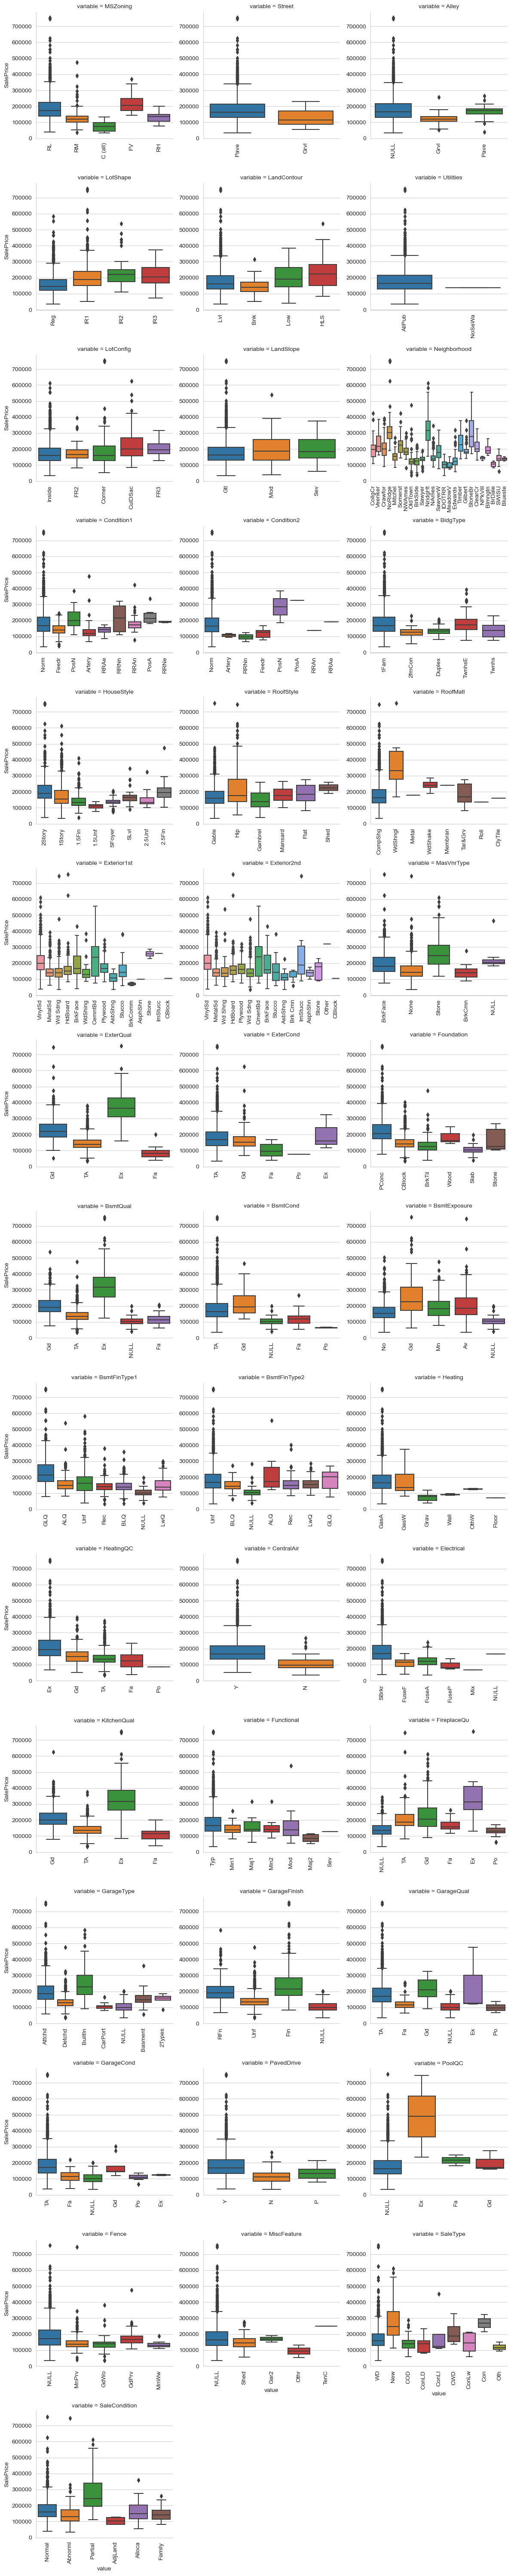

In [18]:
for c in categorical:
    train[c] = train[c].fillna('NULL')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=categorical)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(boxplot, "value", "SalePrice")

In [24]:
train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

# Cleaning Area

In [ ]:
blueprint = {
    'Street': {'Grvl': 0, 'Pave': 1},
    'LotShape': {'IR3': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3},
    
}